## Wine Classification K Means Clustering

### Reading and preprocessing data

In [1]:
df1 <- read.csv('winequality-red.csv', sep=';')
df2 <- read.csv('winequality-white.csv', sep=';')

In [2]:
df1$label <- sapply(df1$pH, function(x){'red'})
df2$label <- sapply(df2$pH, function(x){'white'})

In [3]:
head(df1)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


In [4]:
wine <- rbind(df1,df2)

### EDA

In [5]:
library(ggplot2)

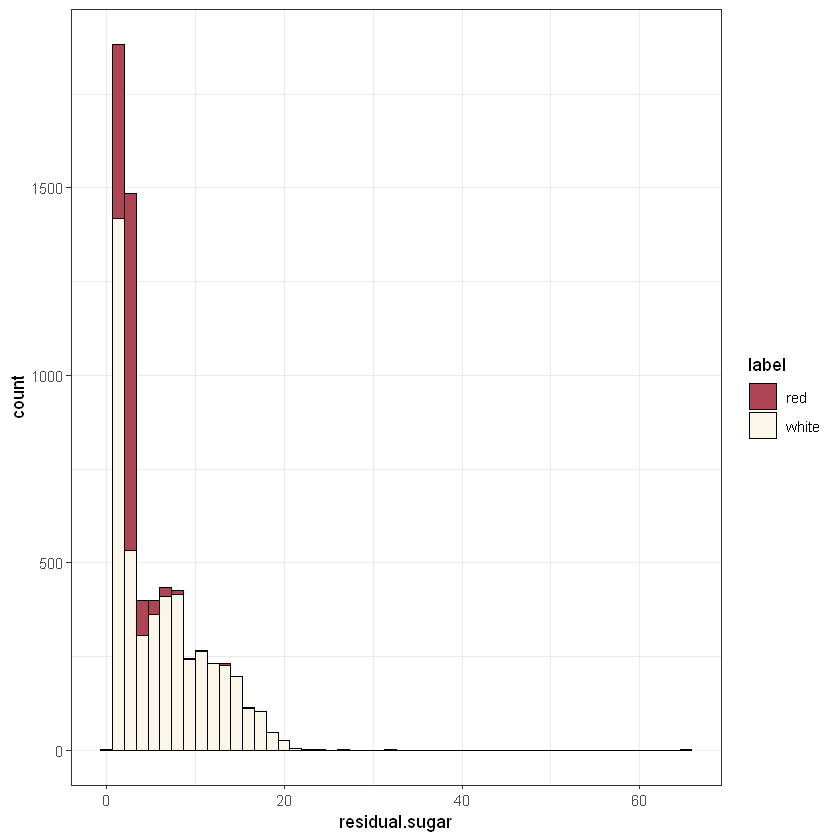

In [6]:
pl1 <- ggplot(wine,aes(residual.sugar)) + geom_histogram(aes(fill=label),color='black',bins=50)
pl2 <- pl1 + scale_fill_manual(values=c('#ae4554','#faf7ea')) + theme_bw()
pl2

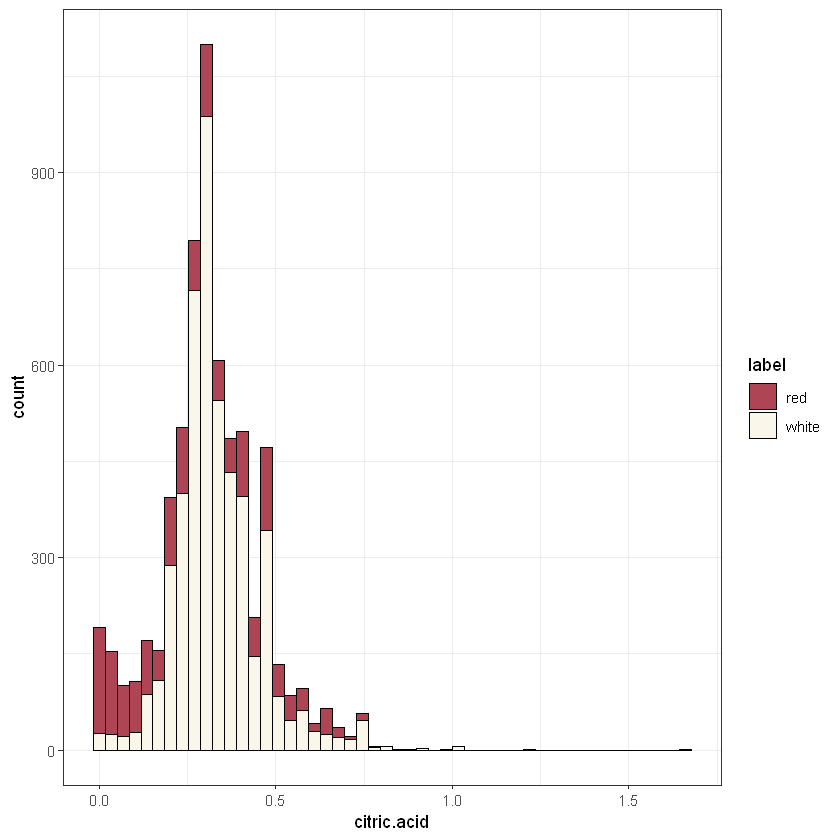

In [7]:
pl1 <- ggplot(wine,aes(citric.acid)) + geom_histogram(aes(fill=label),color='black',bins=50)
pl2 <- pl1 + scale_fill_manual(values=c('#ae4554','#faf7ea')) + theme_bw()
pl2

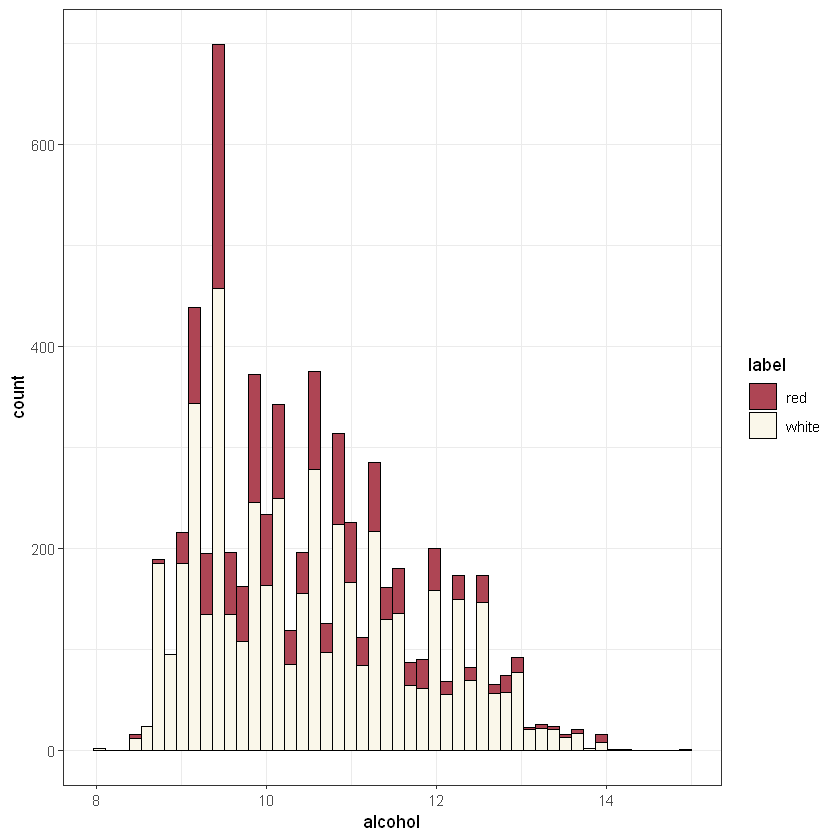

In [8]:
pl1 <- ggplot(wine,aes(alcohol)) + geom_histogram(aes(fill=label),color='black',bins=50)
pl2 <- pl1 + scale_fill_manual(values=c('#ae4554','#faf7ea')) + theme_bw()
pl2

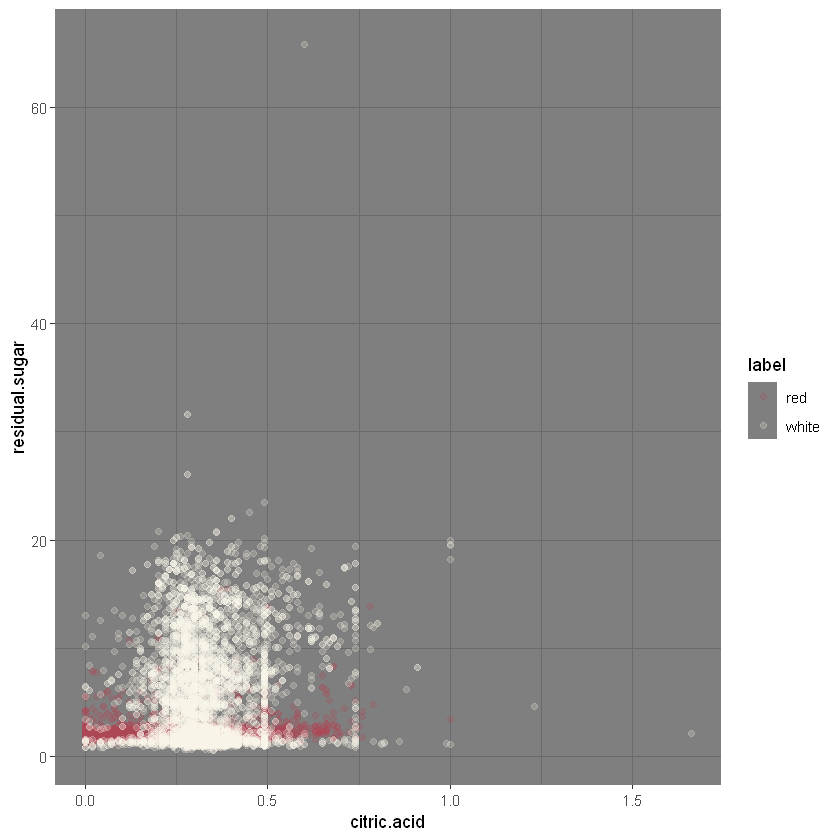

In [12]:
pl1 <- ggplot(wine, aes(citric.acid, residual.sugar)) + geom_point(aes(color=label), alpha=0.2)
pl2 <- pl1 + scale_color_manual(values = c('#ae4554','#faf7ea')) + theme_dark()
pl2

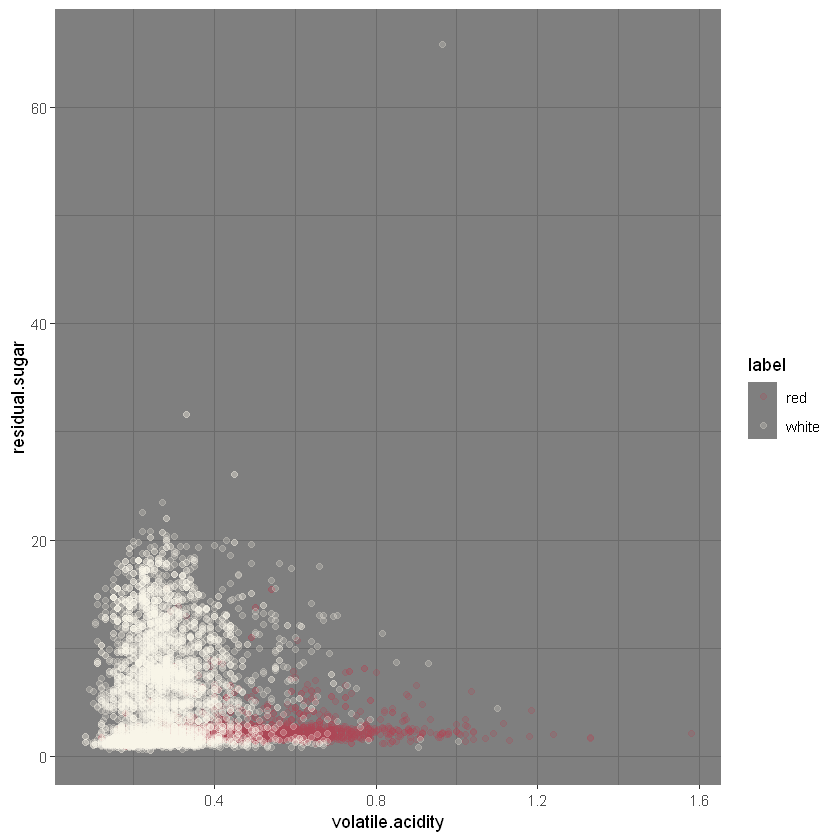

In [11]:
pl1 <- ggplot(wine, aes(volatile.acidity, residual.sugar)) + geom_point(aes(color=label), alpha=0.2)
pl2 <- pl1 + scale_color_manual(values = c('#ae4554','#faf7ea')) + theme_dark()
pl2

### Building the Model

In [13]:
clus.data <- wine[,1:12]
wine.cluster <- kmeans(clus.data, 2)
wine.cluster$centers

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.623219,0.4086378,0.2908725,3.076425,0.06580983,18.39868,63.26318,0.9945736,3.254882,0.5724145,10.79722,5.810541
2,6.904812,0.2871659,0.3397642,7.244809,0.04859257,39.75590,155.69246,0.9947903,3.190808,0.4999485,10.25932,5.824343


In [14]:
table(wine$label, wine.cluster$cluster)

       
           1    2
  red   1514   85
  white 1294 3604

## END!!!